# Example1
This tutorial describes preprocess using "prepnet" to predict IRIS specify by SVC.

In [2]:
import prepnet

# Dependency libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import datasets

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B90164AC88>,
      dtype=object)

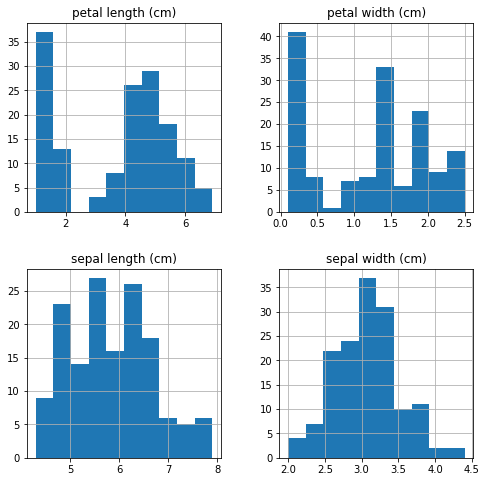

In [3]:
# Load dataset and display distribution
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
display(df.head())
df.hist(figsize=(8, 8))

# Preprocess using prepnet
The Series wise converters are numerical normalization or NaN imputation or others.
There are always keep original columns and indices.
The Frame wise converters change columns and indices.

Almost conversion can directly invoke from FunctionalContext.
But, converters of changing indices cannot directly invoke from FunctionalContext.
In this case conversions need to invoke FunctionalContext.post accessor.
This accessor always run after other converters.



In [4]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                object
dtype: object

In [5]:
context = prepnet.FunctionalContext()
with context.enter('normalize'):
    context[
        'sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)',
    ].standardize()
with context.enter('outlier-process'):
    context[
        'sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)',
    ].quantile_round(0.99)
with context.enter('post'):
    context.split(5)

preprocessed_df_list = list(context.encode(df))
train_df = pd.concat(preprocessed_df_list[:4], axis=0)
test_df = preprocessed_df_list[-1]
display(train_df.head(10))
train_df.hist(figsize=(8, 8))
test_df.hist(figsize=(8, 8))

TypeError: object of type 'NoneType' has no len()

# Training and display predictions
This 

In [5]:
# Training SVM multi-classification using one vs rest
from sklearn.metrics import accuracy_score
target_columns = 'target'

classifier = SVC(degree=3)
classifier.fit(train_df.drop(columns=target_columns), train_df[target_columns])
train_pred_labels = classifier.predict(train_df.drop(columns=target_columns))

print(f'Accuracy: {accuracy_score(train_df[target_columns], train_pred_labels):.3f}')
display(pd.crosstab(
    train_df[target_columns].reset_index(drop=True), 
    pd.Series(train_pred_labels, name='pred')
))

Accuracy: 0.983


pred,setosa,versicolor,virginica
target,,,
setosa,41,0,0
versicolor,0,40,1
virginica,0,1,37


In [6]:
test_pred_labels = classifier.predict(test_df.drop(columns=target_columns))

print(f'Accuracy: {accuracy_score(test_df[target_columns], test_pred_labels):.3f}')
display(pd.crosstab(
    test_df[target_columns].reset_index(drop=True), 
    pd.Series(test_pred_labels, name='pred')
))

Accuracy: 0.933


pred,setosa,versicolor,virginica
target,,,
setosa,9,0,0
versicolor,0,9,0
virginica,0,2,10


# Disable normalize and compare accuracy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
65,6.7,3.1,4.4,1.4,versicolor
128,6.4,2.8,5.6,2.1,virginica
81,5.5,2.4,3.7,1.0,versicolor
137,6.4,3.1,5.5,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica
71,6.1,2.8,4.0,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor
45,4.8,3.0,1.4,0.3,setosa
35,5.0,3.2,1.2,0.2,setosa
115,6.4,3.2,5.3,2.3,virginica


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214C053FD48>,
      dtype=object)

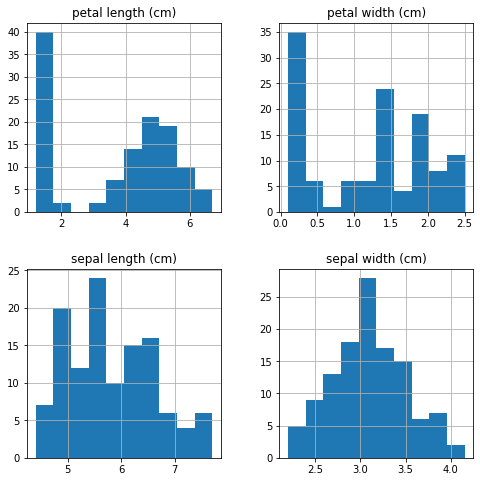

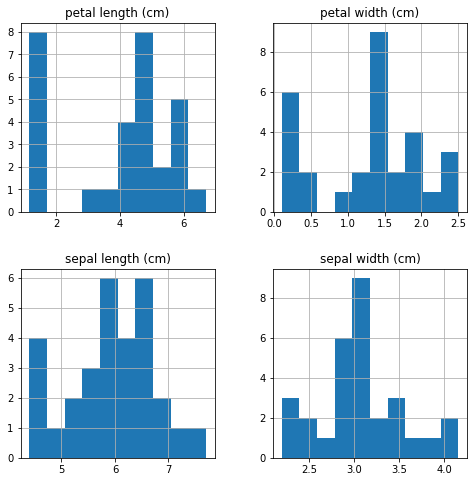

In [7]:
context2 = context.disable('normalize')
preprocessed_df_list = list(context2.encode(df))
train_df = pd.concat(preprocessed_df_list[:4], axis=0)
test_df = preprocessed_df_list[-1]
display(train_df.head(10))
train_df.hist(figsize=(8, 8))
test_df.hist(figsize=(8, 8))

In [8]:
# Training SVM multi-classification using one vs rest
from sklearn.metrics import accuracy_score
target_columns = 'target'

classifier = SVC(degree=3)
classifier.fit(train_df.drop(columns=target_columns), train_df[target_columns])
train_pred_labels = classifier.predict(train_df.drop(columns=target_columns))

print(f'Train Accuracy: {accuracy_score(train_df[target_columns], train_pred_labels):.3f}')
display(pd.crosstab(
    train_df[target_columns].reset_index(drop=True), 
    pd.Series(train_pred_labels, name='pred')
))

test_pred_labels = classifier.predict(test_df.drop(columns=target_columns))

print(f'Test Accuracy: {accuracy_score(test_df[target_columns], test_pred_labels):.3f}')
display(pd.crosstab(
    test_df[target_columns].reset_index(drop=True), 
    pd.Series(test_pred_labels, name='pred')
))

Train Accuracy: 0.975


pred,setosa,versicolor,virginica
target,,,
setosa,42,0,0
versicolor,0,35,2
virginica,0,1,40


Test Accuracy: 0.967


pred,setosa,versicolor,virginica
target,,,
setosa,8,0,0
versicolor,0,12,1
virginica,0,0,9
